In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

# Read data using pandas

In [3]:
df = pd.read_csv("/content/drive/MyDrive/atlas-higgs-challenge-2014-v2.csv.gz") # read data
df = df.drop(['KaggleSet', 'KaggleWeight', 'Weight'], axis=1) # remove unwanted columns
df.Label = df.Label.map({'b': 0, 's': 1})   # For target output (Label), replace b (or background) and s (or signal) with 0 and 1, respectively
df = df.replace({-999.00: np.nan}) # Replace -999.00 (missing value) with np.nan in df
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,0
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0


# Brief Info about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      818238 non-null  int64  
 1   DER_mass_MMC                 693636 non-null  float64
 2   DER_mass_transverse_met_lep  818238 non-null  float64
 3   DER_mass_vis                 818238 non-null  float64
 4   DER_pt_h                     818238 non-null  float64
 5   DER_deltaeta_jet_jet         237985 non-null  float64
 6   DER_mass_jet_jet             237985 non-null  float64
 7   DER_prodeta_jet_jet          237985 non-null  float64
 8   DER_deltar_tau_lep           818238 non-null  float64
 9   DER_pt_tot                   818238 non-null  float64
 10  DER_sum_pt                   818238 non-null  float64
 11  DER_pt_ratio_lep_tau         818238 non-null  float64
 12  DER_met_phi_centrality       818238 non-null  float64
 13 

# Handling NaN values

In [4]:
# randomise missing data for DataFrame (within a column)
random.seed(10) 
for col in df.columns:
    data = df[col]
    mask = data.isnull()
    samples = random.choices( data[~mask].values , k = mask.sum() )
    data[mask] = samples
df.head() 

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,6.279,898.182,-8.632,3.473,2.078,...,164.546,1,46.226,0.725,1.158,84.648,-0.180,-1.492,46.226,0
2,100002,264.595,162.172,125.953,35.635,1.036,90.304,5.423,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,82.280,0.545,2.486,44.251,0
3,100003,143.905,81.417,80.943,0.414,1.091,90.912,3.720,3.310,0.414,...,86.062,0,52.823,1.366,1.456,32.073,2.875,0.438,-0.000,0
4,100004,175.864,16.915,134.805,16.405,6.271,269.756,-3.105,3.891,16.405,...,53.131,0,30.242,-0.592,0.768,48.993,2.637,2.929,0.000,0


**Testing DataFrame for NaN values (It does not contain any NaN values)**

In [5]:
df.isnull().any().any()

False

**The chart below shows that there are over 500,000 and 250,000 background (or b or 0) and signal (or s or 1) events, respectively.**

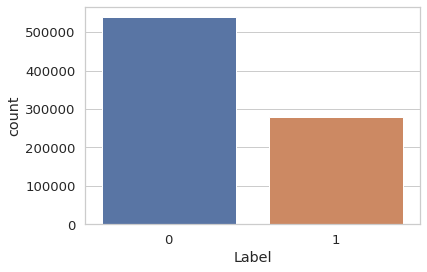

In [6]:
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.countplot(data=df, x="Label") 

# Boxplots and Outliers

An outlier is a data point that is noticeably different from the rest. Many machine learning models are easily impacted by the outliers in the training data.

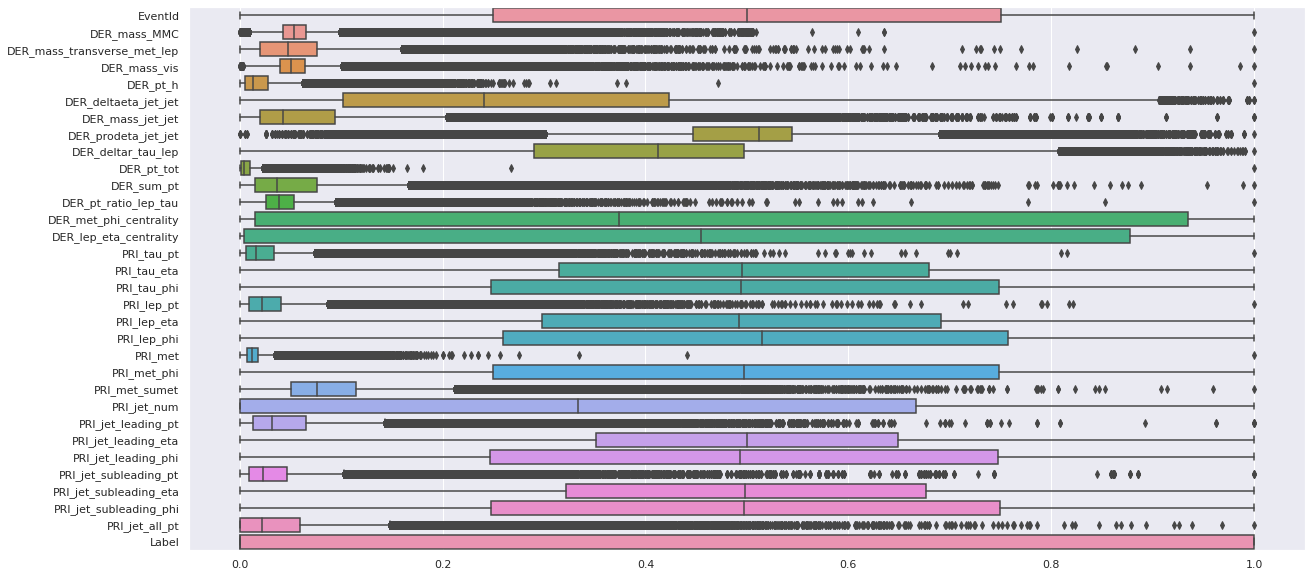

In [7]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df) # normalization
df_array_to_df = pd.DataFrame(df_scaled, columns = df.columns) # convert array into dataframe
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.0)
sns.boxplot(data=df_array_to_df, orient="h")

# Skewness

The skewness is a measure of symmetry or asymmetry of data distribution. Data can be positive-skewed (data-pushed towards the right side) or negative-skewed (data-pushed towards the left side). For `DER_mass_MMC`, the skewness is between -0.5 & 0.5, so the data are nearly symmetrical. But, for `DER_mass_transverse_met_lep`, the skewness is greater than 1 (positive skewed), so the data are extremely skewed. When data is skewed, the tail region may behave as an outlier for the statistical model, and outliers unsympathetically affect the model’s performance. Some statistical models are hard to outliers like Tree-based models, but it will limit the possibility of trying other models. So there is a necessity to transform the skewed data to be close enough to a Normal distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

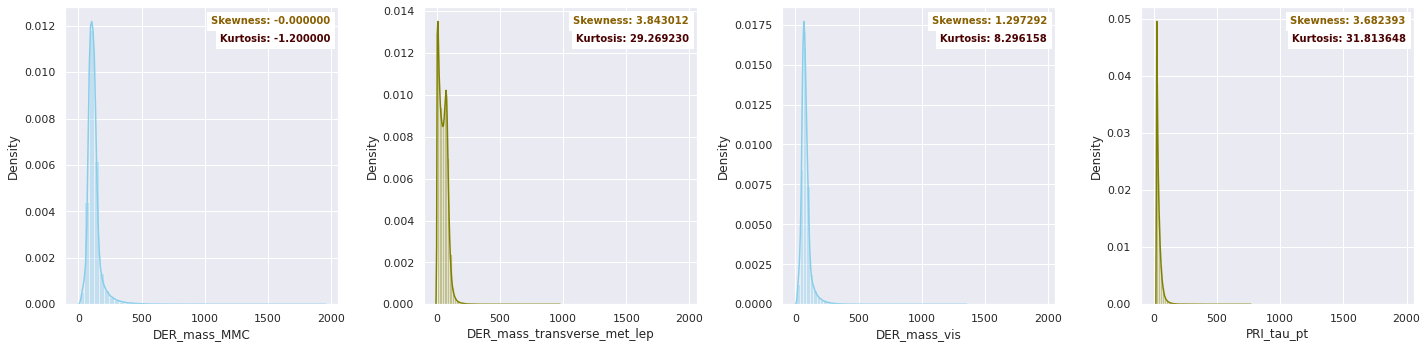

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
sns.distplot(df.iloc[:,1], color="skyblue", ax=axes[0]) 
sns.distplot(df.iloc[:,2], color="olive", ax=axes[1]) 
sns.distplot(df.iloc[:,3], color="skyblue", ax=axes[2])
sns.distplot(df.iloc[:,14], color="olive", ax=axes[3])  

for i, ax in enumerate(axes.reshape(-1)): 
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout() 

# Correlation heatmap

**With `Seaborn's heatmap()` function, I can determine which pairs of variables are most closely related.**

Correlation is a statistical measure that expresses the strength of the relationship between two variables. The two main types of correlation are positive and negative. Positive correlation occurs when two variables move in the same direction; as one increases, so do the other. A negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases. Here, for example, there is a positive correlation between `Label` and `DER_met_phi_centrality`.

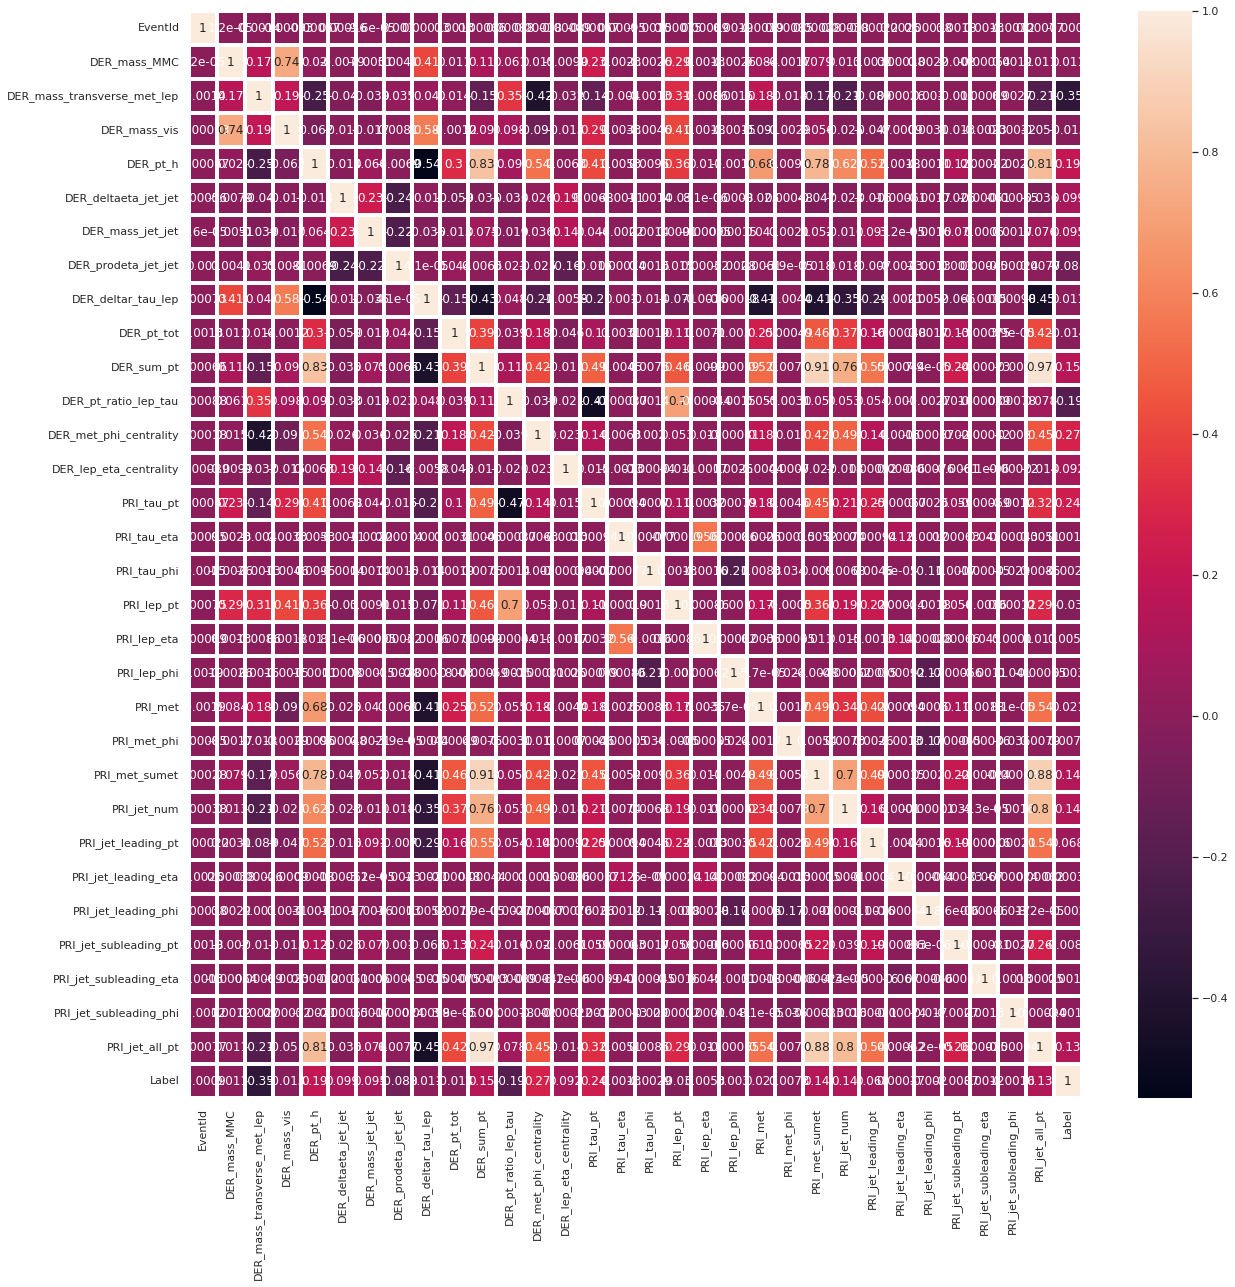

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.set(font_scale=1.0)
sns.heatmap(df.corr() , annot= True, linewidths=3, ax=ax)

# Data Visualization:

<Figure size 1440x720 with 0 Axes>

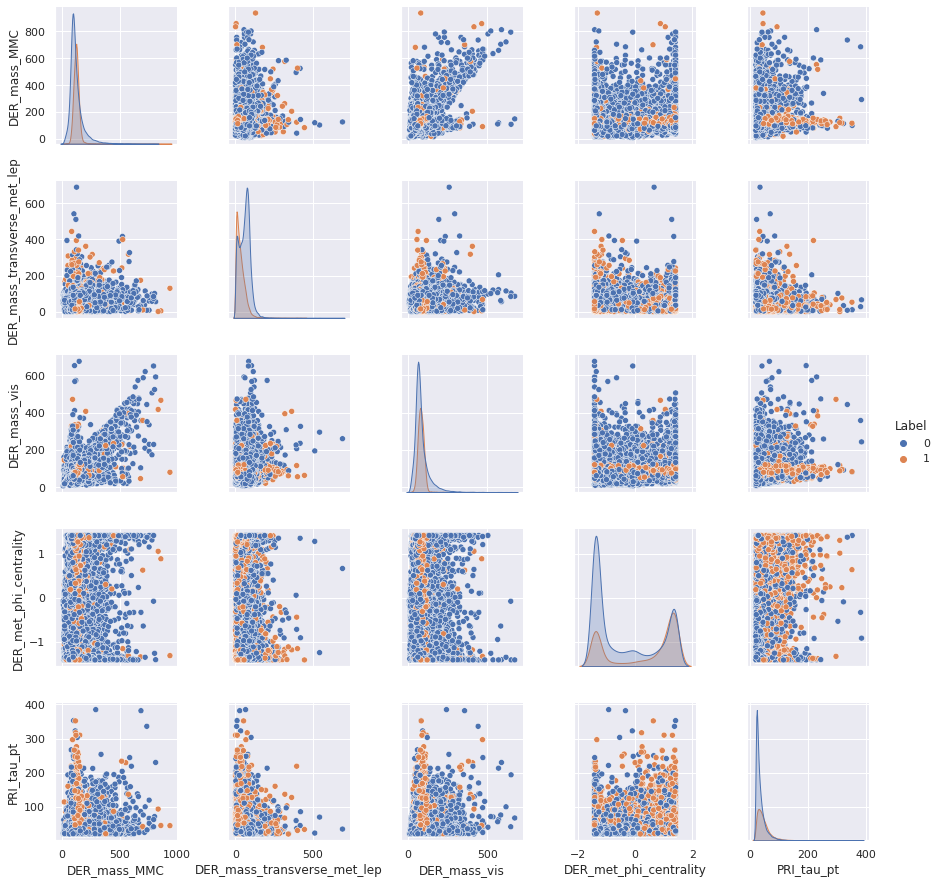

In [ ]:
df1 = df[['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_met_phi_centrality', 'PRI_tau_pt', 'Label']][:40000]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.0)
sns.pairplot(df1, hue="Label", palette="deep") 

# 1. Feature (DER_mass_MMC)

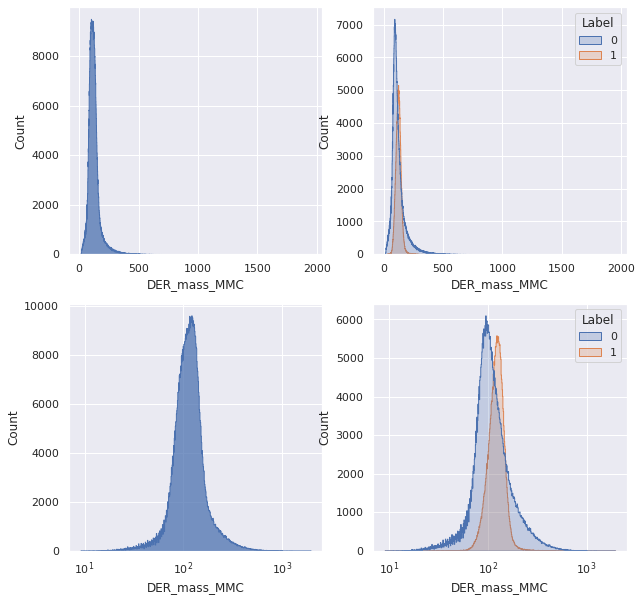

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.histplot(data=df, x="DER_mass_MMC", element="step", ax=axes[0, 0]) 
sns.histplot(data=df, x="DER_mass_MMC", element="step", hue="Label", ax=axes[0, 1]) 
sns.histplot(data=df, x="DER_mass_MMC", log_scale=True, element="step", ax=axes[1, 0]) 
sns.histplot(data=df, x="DER_mass_MMC", log_scale=True, element="step", hue="Label", ax=axes[1, 1]) 

# 2. Feature (DER_mass_transverse_met_lep)

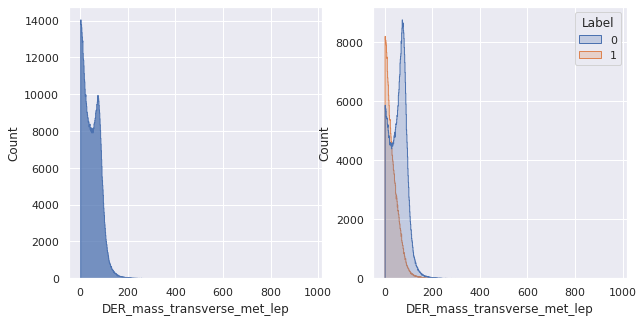

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 5)) 
sns.histplot(data=df, x="DER_mass_transverse_met_lep", element="step", ax=axes[0]) 
sns.histplot(data=df, x="DER_mass_transverse_met_lep", element="step", hue="Label", ax=axes[1])   

# 3. Feature (DER_mass_vis) 

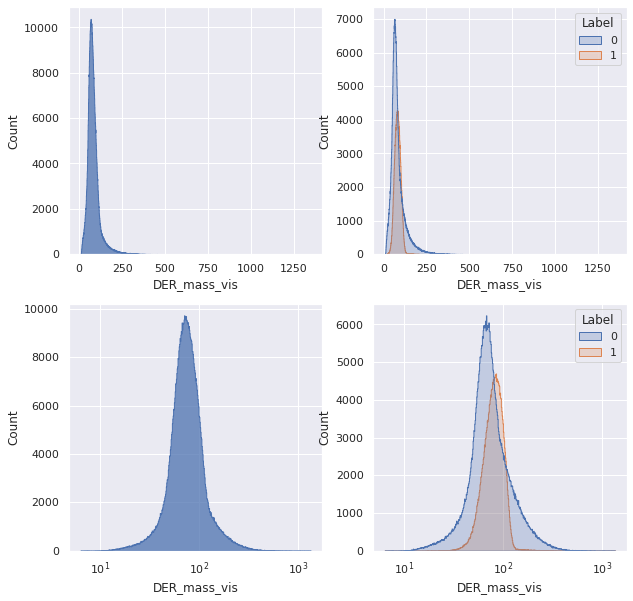

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.histplot(data=df, x="DER_mass_vis", element="step", ax=axes[0, 0]) 
sns.histplot(data=df, x="DER_mass_vis", element="step", hue="Label", ax=axes[0, 1]) 
sns.histplot(data=df, x="DER_mass_vis", log_scale=True, element="step", ax=axes[1, 0]) 
sns.histplot(data=df, x="DER_mass_vis", log_scale=True, element="step", hue="Label", ax=axes[1, 1]) 

# 4. Feature (PRI_tau_pt) 

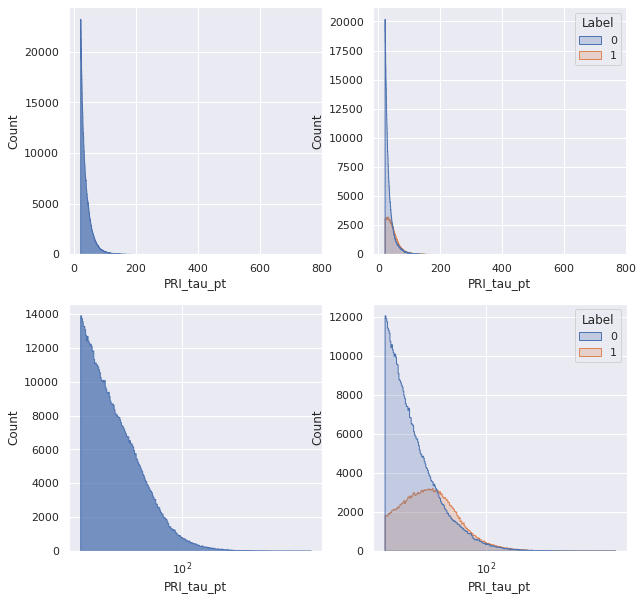

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.histplot(data=df, x="PRI_tau_pt", element="step", ax=axes[0, 0]) 
sns.histplot(data=df, x="PRI_tau_pt", element="step", hue="Label", ax=axes[0, 1]) 
sns.histplot(data=df, x="PRI_tau_pt", log_scale=True, element="step", ax=axes[1, 0]) 
sns.histplot(data=df, x="PRI_tau_pt", log_scale=True, element="step", hue="Label", ax=axes[1, 1]) 

# Scatter plots 

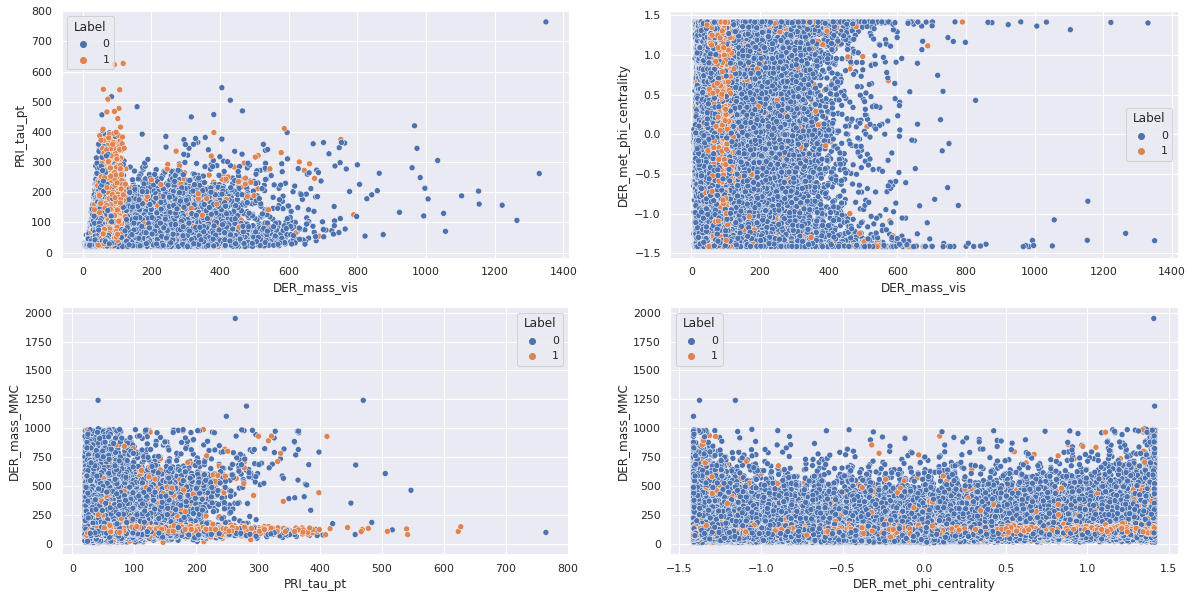

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(20, 10)) 
sns.scatterplot(data=df, y='PRI_tau_pt', x='DER_mass_vis', hue='Label', palette="deep", ax=axes[0, 0]) 
sns.scatterplot(data=df, y='DER_met_phi_centrality', x='DER_mass_vis', hue='Label', palette="deep", ax=axes[0, 1]) 
sns.scatterplot(data=df, y='DER_mass_MMC', x='PRI_tau_pt', hue='Label', palette="deep", ax=axes[1, 0]) 
sns.scatterplot(data=df, y='DER_mass_MMC', x='DER_met_phi_centrality', hue='Label', palette="deep", ax=axes[1, 1]) 

**I split the DataFrame into X (data) and Y (label), where:**

In [8]:
X = df.drop(['Label'], axis=1) 
y = df['Label']  

**Using a train-test split, I split X and Y into train and test data.**


*   Train Dataset: Used to fit model.
*   Test Dataset: Used to evaluate the fit model.



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Selection Based on Mutual Information

`Mutual information` (MI) is a non-negative value measuring the dependencies between two random variables. When two random variables are independent, it is equal to zero, and when it is higher, it indicates greater dependence between them.

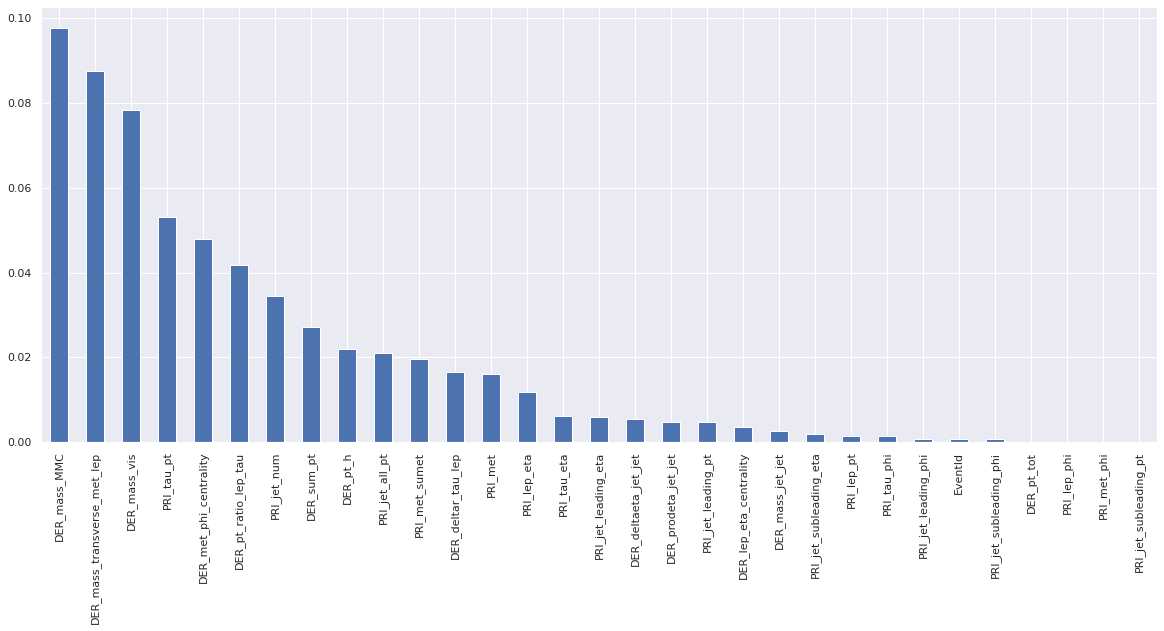

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)) 

We can strengthen our model's performance through feature selection by removing unwanted features and finding the most relevant ones.

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_met_phi_centrality', 'PRI_tau_pt'],
      dtype='object')

So these are the top five features that give the most information about the target variable.

# XGBoost

**Fit the model**

In [ ]:
my_model = XGBClassifier(n_estimators=2000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=8, 
             eval_set=[(X_test, y_test)], 
             verbose=False) 

XGBClassifier(learning_rate=0.05, n_estimators=2000)

**Evaluate model performance**

In [ ]:
print('Accuracy of XGBClassifier on train set: {:.3f}' .format(my_model.score(X_train, y_train)))
print('Accuracy of XGBClassifier on test set: {:.3f}' .format(my_model.score(X_test, y_test))) 

Accuracy of XGBClassifier on train set: 0.835
Accuracy of XGBClassifier on test set: 0.835


**Model prediction**

In order to show easily the differences between model-based prediction and real values, I create a dataframe.

In [ ]:
y_pred = my_model.predict(X_test) 
d = {'real or true values(y_test)': y_test, 'Model_Prediction': y_pred} 
dfC = pd.DataFrame(data=d)
dfC = dfC.replace({0: 'b', 1: 's'})
dfC.head(20) 

,real or true values(y_test),Model_Prediction
59024,s,s
136820,b,b
746100,s,s
434878,s,s
616295,b,b
72673,b,b
581724,s,s
202461,b,b
458799,s,s
625263,b,b


# ROC & Precision_Recall for XGBoost

For the ROC Curve, the ideal curve is close to the top left: I want a classifier that produces a high recall while keeping a low false positive rate. Also, for Precision_Recall, the closer a curve stays to the upper right corner, the better the classifier. A point at the upper right means high precision and high recall for the same threshold.

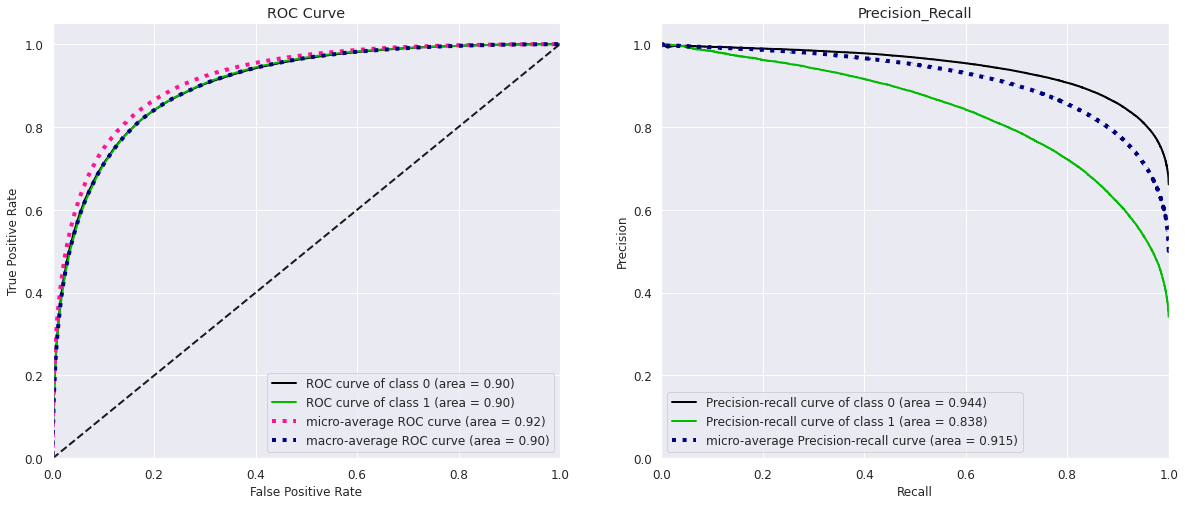

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

skplt.metrics.plot_roc(y_test, my_model.predict_proba(X_test), ax=ax1, title= 'ROC Curve')
skplt.metrics.plot_precision_recall(y_test, my_model.predict_proba(X_test), ax=ax2, title='Precision_Recall')

plt.show() 

# Confusion Matrix

<Figure size 1440x576 with 0 Axes>

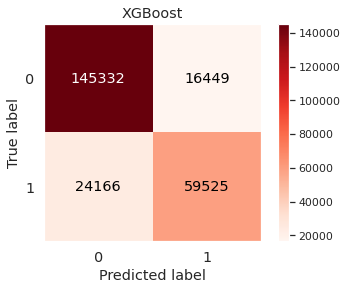

In [ ]:
plt.figure(figsize=(20, 8))
skplt.metrics.plot_confusion_matrix(y_test, my_model.predict(X_test), cmap='Reds', title='XGBoost', text_fontsize='large')
plt.show() 

# TensorFlow

The first thing I do is train a simple Neural Network using TensorFlow, and then plot accuracy and loss graphs on the training and validation datasets to find a balance between the model that is underfitting and one that is overfitting, resulting in a model with a good fit. I first need to convert the train and test data into a TensorFlow tensor.

**To convert DataFrame to a tensor, I use tf.convert_to_tensor**

In [10]:
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(572766, 31), dtype=float64, numpy=
array([[ 6.52203e+05,  9.97960e+01,  4.01410e+01, ...,  1.24500e+00,
        -1.33600e+00,  2.38921e+02],
       [ 3.95771e+05,  1.17507e+02,  7.22110e+01, ..., -2.41300e+00,
        -2.44800e+00,  0.00000e+00],
       [ 3.91027e+05,  1.12459e+02,  3.55720e+01, ..., -2.94000e+00,
         1.28300e+00,  1.32445e+02],
       ...,
       [ 2.17952e+05,  9.06700e+01,  7.40670e+01, ..., -1.40100e+00,
         1.52800e+00,  0.00000e+00],
       [ 5.35829e+05,  2.71436e+02,  9.69250e+01, ...,  1.30000e-02,
        -2.43700e+00,  4.62512e+02],
       [ 4.05711e+05,  1.17052e+02,  6.36130e+01, ..., -1.50000e-01,
         1.67500e+00,  1.46470e+02]])>

In [11]:
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(245472, 31), dtype=float64, numpy=
array([[ 1.59024e+05,  1.06530e+02,  6.57490e+01, ..., -2.24000e-01,
        -2.80100e+00,  1.43764e+02],
       [ 2.36820e+05,  8.72630e+01,  3.14030e+01, ...,  7.76000e-01,
        -1.74500e+00,  8.76160e+01],
       [ 8.46100e+05,  1.11784e+02,  2.46420e+01, ..., -2.00000e-03,
         3.04200e+00,  9.39250e+01],
       ...,
       [ 7.12544e+05,  1.11926e+02,  1.95050e+01, ...,  6.37000e-01,
        -6.40000e-01,  4.36020e+01],
       [ 2.93823e+05,  1.09930e+02,  4.98200e+00, ..., -2.83000e+00,
        -1.04700e+00,  9.06920e+01],
       [ 6.43059e+05,  1.22814e+02,  9.41400e+00, ...,  7.43000e-01,
        -2.22700e+00,  1.47511e+02]])>

**Normalize X_train, X_test**

In [12]:
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train)

In [14]:
X_test_scaled = tf.keras.layers.Normalization(axis=-1)
X_test_scaled.adapt(X_test)

**Building a simple neural network model**

The compile function takes three arguments: optimizer, loss, and metrics.



*   **Optimizer**: These are certain algorithms that are used to change the attributes of the neural network to decrease the loss rate.
*   **Loss**: This is used to compute the quantity that a model should seek to minimize during training.


*   **Metrics**: This is used to judge the performance of the model.

**Model: There are two hidden layers, each with `128 neurons` and an activation function of `sigmoid`, `epochs = 100`, and `batch_size = 1000`.**





In [15]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=1000)  

Epoch 1/100
573/573 [==============================] - 8s 12ms/step - loss: 0.5125 - accuracy: 0.7424 - val_loss: 0.4541 - val_accuracy: 0.7854
Epoch 2/100
573/573 [==============================] - 7s 13ms/step - loss: 0.4240 - accuracy: 0.8057 - val_loss: 0.3989 - val_accuracy: 0.8192
Epoch 3/100
573/573 [==============================] - 6s 11ms/step - loss: 0.3923 - accuracy: 0.8225 - val_loss: 0.3867 - val_accuracy: 0.8248
Epoch 4/100
573/573 [==============================] - 8s 14ms/step - loss: 0.3836 - accuracy: 0.8268 - val_loss: 0.3798 - val_accuracy: 0.8289
Epoch 5/100
573/573 [==============================] - 6s 10ms/step - loss: 0.3790 - accuracy: 0.8296 - val_loss: 0.3771 - val_accuracy: 0.8307
Epoch 6/100
573/573 [==============================] - 7s 12ms/step - loss: 0.3757 - accuracy: 0.8310 - val_loss: 0.3760 - val_accuracy: 0.8303
Epoch 7/100
573/573 [==============================] - 6s 11ms/step - loss: 0.3731 - accuracy: 0.8325 - val_loss: 0.3724 - val_accuracy:

**Evaluating the model**

I create plots from the collected history data.



*   A plot of accuracy on the training and validation datasets over training epochs.
*   A plot of loss on the training and validation datasets over training epochs.

7671/7671 - 23s - loss: 0.3511 - accuracy: 0.8442 - 23s/epoch - 3ms/step


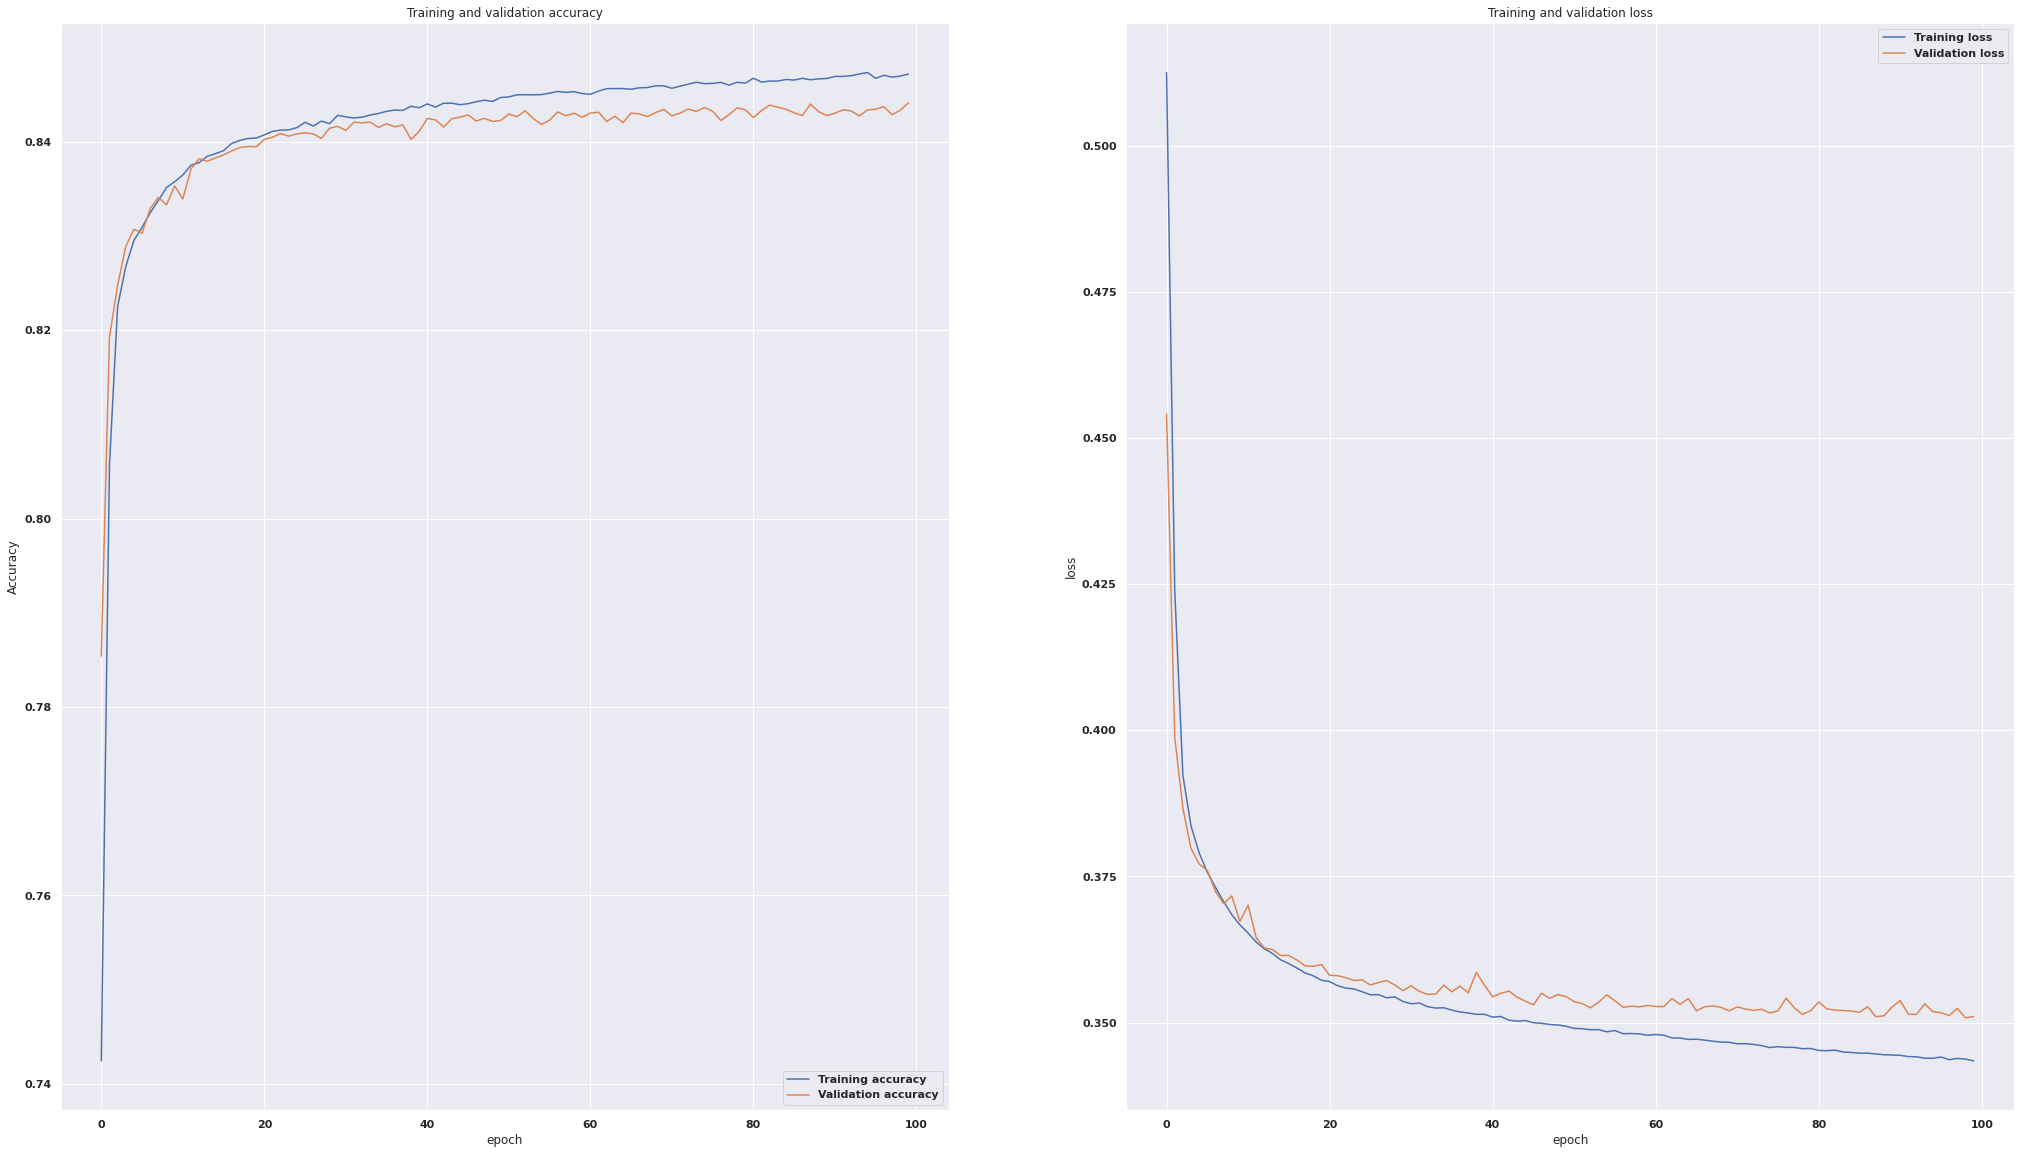

In [16]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(35,20))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

According to the plot of loss, validation loss is decreasing before the 100th epoch, so the model is underfitting. However, after the 100th epoch, validation loss is increasing, which indicates the model is overfitting. At the 100th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 84.4 %. The goal of Deep Learning is to find a balance between a model that is underfitting and one that is overfitting(converging), resulting in a model with a good fit. I found an optimum where the change in the slope of loss is around the 100th epoch, as shown above. At that point, the training process can be stopped.

# Prediction

In [17]:
classifications = model.predict(X_test)
# Generate arg maxes for predictions
classes = np.argmax(classifications, axis = 1)
X_test['Prediction of Label'] = classes.tolist() 
X_test['real Label'] = y_test.tolist() 
df_pred = X_test[['real Label', 'Prediction of Label']]
df_pred = df_pred.replace({0: 'b', 1: 's'}) 
df_pred.head(30) 

7671/7671 [==============================] - 17s 2ms/step


,real Label,Prediction of Label
59024,s,s
136820,b,b
746100,s,b
434878,s,s
616295,b,s
72673,b,b
581724,s,s
202461,b,b
458799,s,s
625263,b,b
